In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Разведочный анализ данных

### Ценообразование на ноутбуки

In [4]:
df = pd.read_csv("laptopPrice.csv")

In [5]:
df.shape

(823, 19)

In [6]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
brand,ASUS,Lenovo,Lenovo,ASUS,ASUS,ASUS,ASUS,ASUS,Lenovo,acer
processor_brand,Intel,Intel,Intel,Intel,Intel,Intel,Intel,Intel,Intel,AMD
processor_name,Core i3,Core i3,Core i3,Core i5,Celeron Dual,Celeron Dual,Celeron Dual,Core i5,Core i5,Ryzen 5
processor_gnrtn,10th,10th,10th,10th,Not Available,Not Available,Not Available,10th,10th,10th
ram_gb,4 GB,4 GB,4 GB,8 GB,4 GB,4 GB,4 GB,8 GB,4 GB,4 GB
ram_type,DDR4,DDR4,DDR4,DDR4,DDR4,DDR4,DDR4,DDR4,DDR4,DDR4
ssd,0 GB,0 GB,0 GB,512 GB,0 GB,0 GB,0 GB,0 GB,0 GB,0 GB
hdd,1024 GB,1024 GB,1024 GB,0 GB,512 GB,512 GB,512 GB,1024 GB,1024 GB,512 GB
os,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows
os_bit,64-bit,64-bit,64-bit,32-bit,64-bit,64-bit,32-bit,32-bit,32-bit,32-bit


## Описание признаков
* brand - Бренд продукта
* processor_brand - Бренд процессора
* processor_name - Наименование процессора
* processor_gnrtn - Поколение процессора
* ram_gb - Обьем ОЗУ
* ram_type - Тип ОЗУ
* SSD - Обьем ссд накопителя
* HDD - Обьем жесткого диска
* OS - операционная система
* os_bit - Разрядность ОС
* graphic_card_gb - Обьем памяти видеокарты
* weight - Тяжесть (Вес)
* warranty - Гарантия
* Touchscreen - Сенсорный экран
* msoffice - Установленый пакет офисных программ
* Price - Цена (Целевая переменная)
* rating - рейтинг
* Number of Ratings - Кол-во оценок
* Number of Reviews - Кол-во отзывов

Целевая переменная выбрана в соответствии наличием и качеством компонентов в ноутбуках, так же с оценкой пользователей в виде рейтинга ✍(◔◡◔)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [10]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [11]:
df.shape

(823, 19)

Посмотрев на данные, мы видим что никаких аномальных значений не имеется, однако размерность DATAFRAME мала, что может вызвать неточность.

In [13]:
df.brand.value_counts()

brand
ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: count, dtype: int64

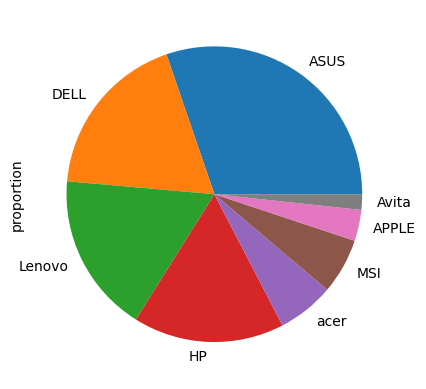

In [14]:
df['brand'].value_counts(normalize=True).plot.pie();

In [15]:
df.os.value_counts()

os
Windows    779
Mac         28
DOS         16
Name: count, dtype: int64

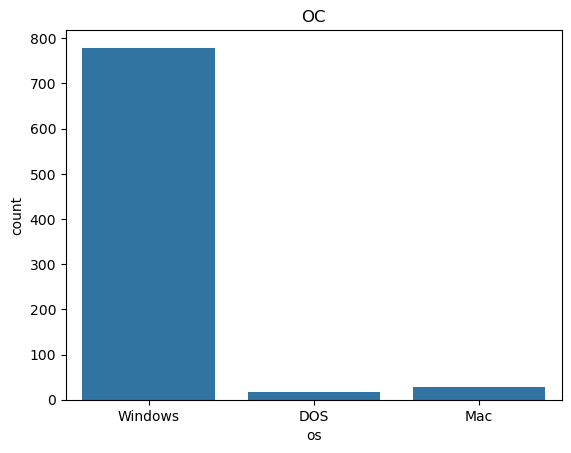

In [16]:
sns.countplot(data=df, x='os')
plt.title('ОС')
plt.show()

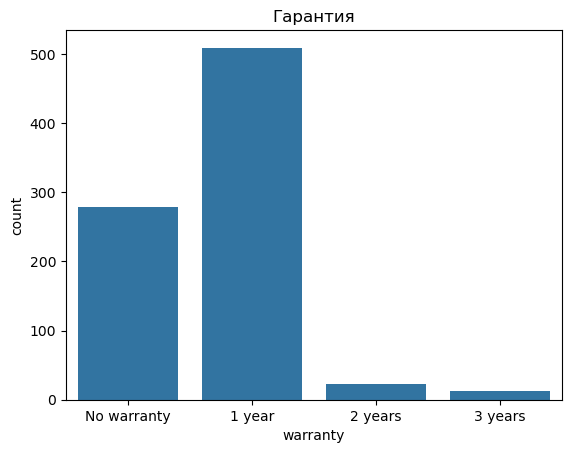

In [17]:
sns.countplot(data=df, x='warranty')
plt.title('Гарантия')
plt.show()

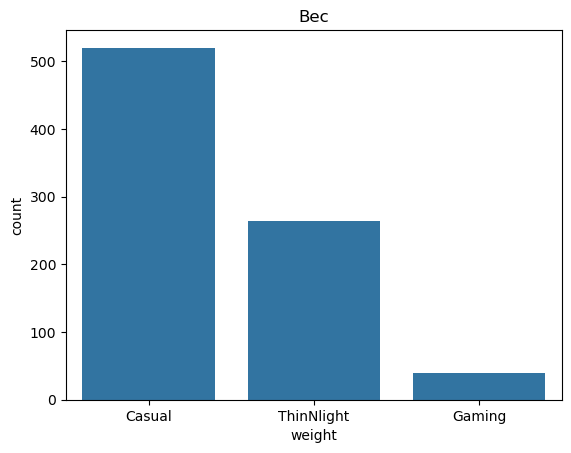

In [18]:
sns.countplot(data=df, x='weight')
plt.title('Вес')
plt.show()

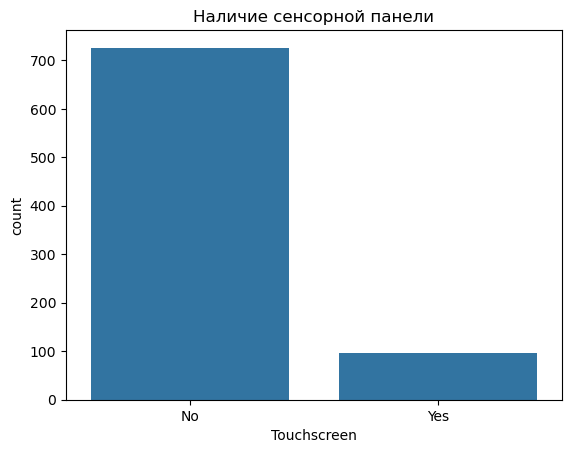

In [19]:
df.Touchscreen.value_counts()
sns.countplot(data=df, x='Touchscreen')
plt.title('Наличие сенсорной панели')
plt.show()

Посмотрев на графики мы видим соотношение и преобладания записей в Dataframe.

# Предобработка данных

In [22]:
import re
delGB = re.compile(r'\D')
df.ssd = df.ssd.map(lambda x: delGB.sub('', x))
df.ram_gb = df.ram_gb.map(lambda x: delGB.sub('', x))
df.rating = df.rating.map(lambda x: delGB.sub('', x))
df.hdd = df.hdd.map(lambda x: delGB.sub('', x))
df.graphic_card_gb = df.graphic_card_gb.map(lambda x: delGB.sub('', x))

Удаляем все значения которые не имеют числовой вид

In [24]:
df.ssd = df.ssd.astype(int)
df.rating = df.rating.astype(int)
df.hdd = df.hdd.astype(int)
df.ram_gb = df.ram_gb.astype(int)
df.graphic_card_gb = df.graphic_card_gb.astype(int)

преобразуем типовые значения в INT

In [26]:
df.ssd.value_counts().sort_index()

ssd
0       124
128       3
256     184
512     398
1024    111
2048      2
3072      1
Name: count, dtype: int64

In [27]:
df.hdd.value_counts().sort_index()

hdd
0       621
512      41
1024    160
2048      1
Name: count, dtype: int64

In [28]:
df.rating.value_counts().sort_index(ascending=False)

rating
5     16
4    444
3    352
2      9
1      2
Name: count, dtype: int64

In [29]:
df.ram_gb.value_counts().sort_index()

ram_gb
4     226
8     418
16    177
32      2
Name: count, dtype: int64

In [30]:
df.graphic_card_gb.value_counts().sort_index()

graphic_card_gb
0    577
2     67
4    128
6     37
8     14
Name: count, dtype: int64

In [31]:
df=pd.get_dummies(df, columns=['weight','warranty','Touchscreen', 'os', 'msoffice', 'os_bit', 'ram_type'], dtype=int, drop_first=True)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
brand,ASUS,Lenovo,Lenovo,ASUS,ASUS,ASUS,ASUS,ASUS,Lenovo,acer
processor_brand,Intel,Intel,Intel,Intel,Intel,Intel,Intel,Intel,Intel,AMD
processor_name,Core i3,Core i3,Core i3,Core i5,Celeron Dual,Celeron Dual,Celeron Dual,Core i5,Core i5,Ryzen 5
processor_gnrtn,10th,10th,10th,10th,Not Available,Not Available,Not Available,10th,10th,10th
ram_gb,4,4,4,8,4,4,4,8,4,4
ssd,0,0,0,512,0,0,0,0,0,0
hdd,1024,1024,1024,0,512,512,512,1024,1024,512
graphic_card_gb,0,0,0,2,0,0,0,2,0,4
Price,34649,38999,39999,69990,26990,22990,21990,58799,49999,59990
rating,2,3,3,3,3,3,3,3,3,4


преобразовали текстовые значения в числовые, для обучения моделей

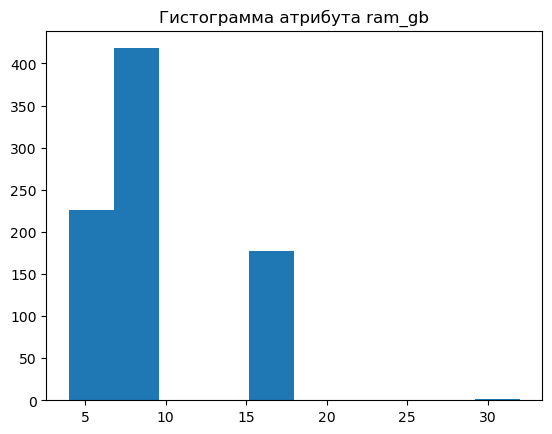

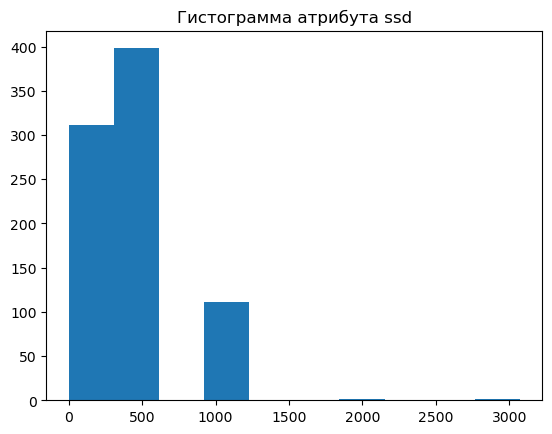

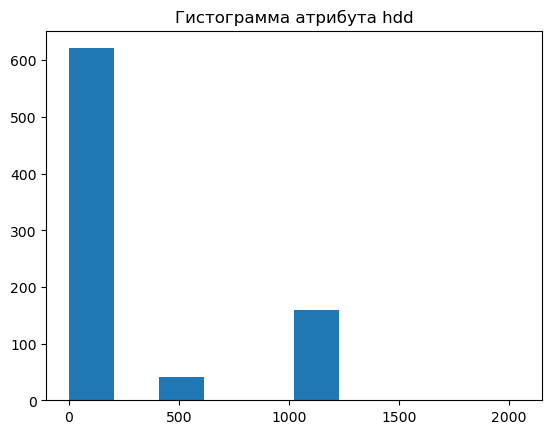

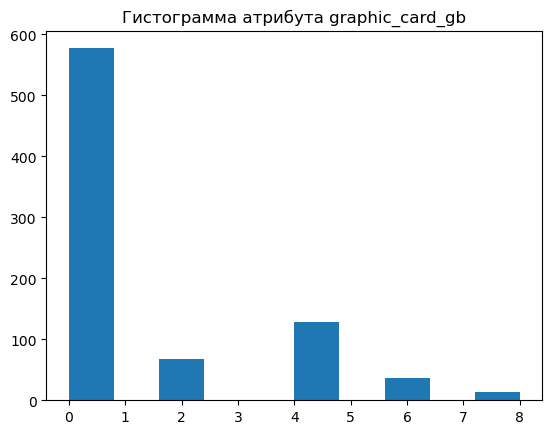

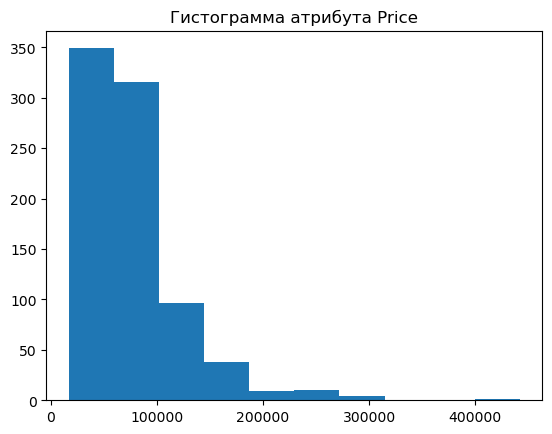

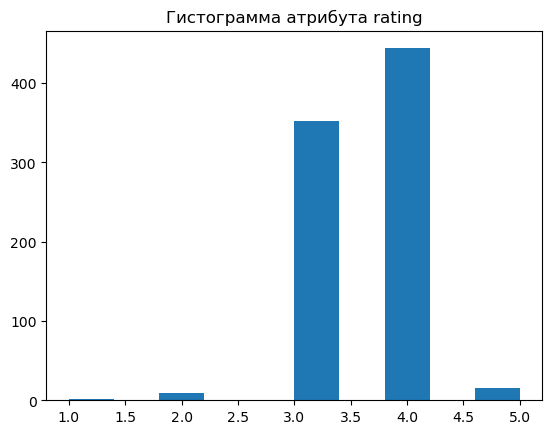

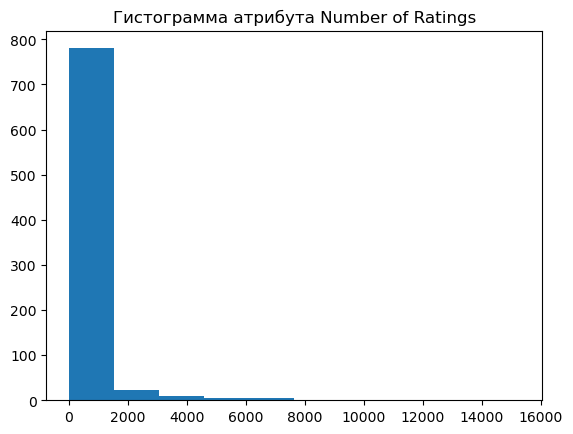

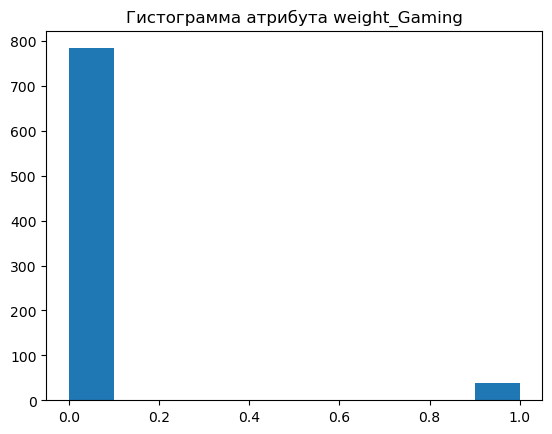

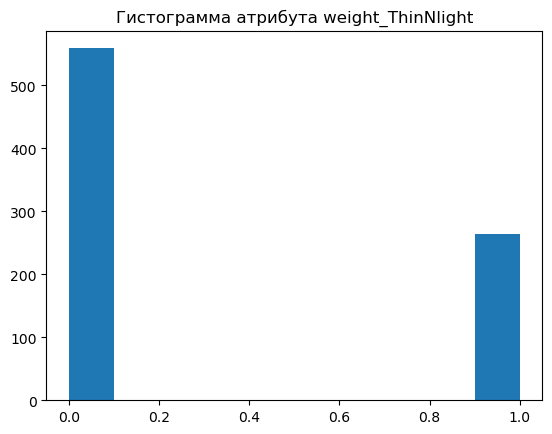

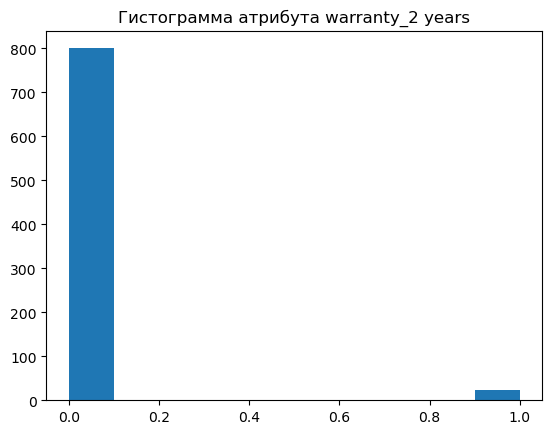

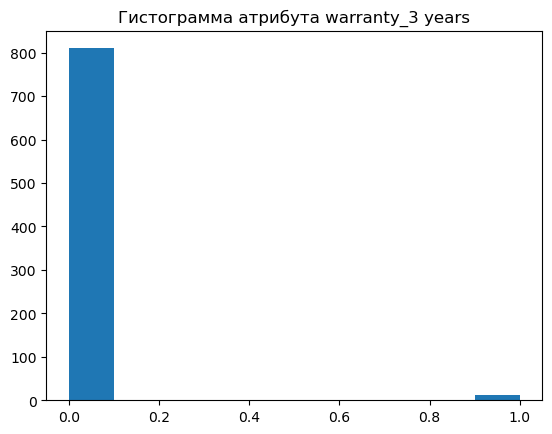

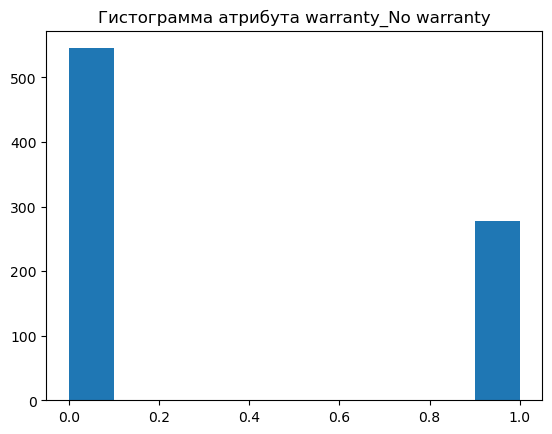

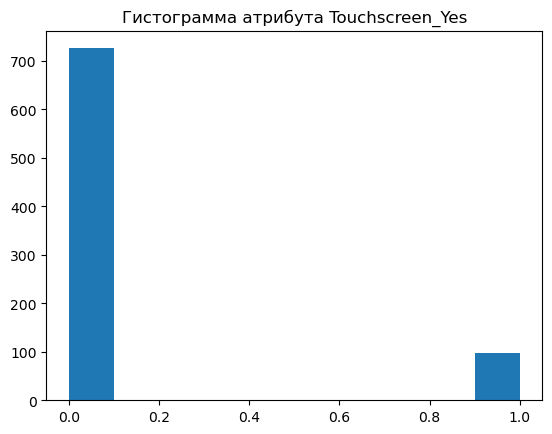

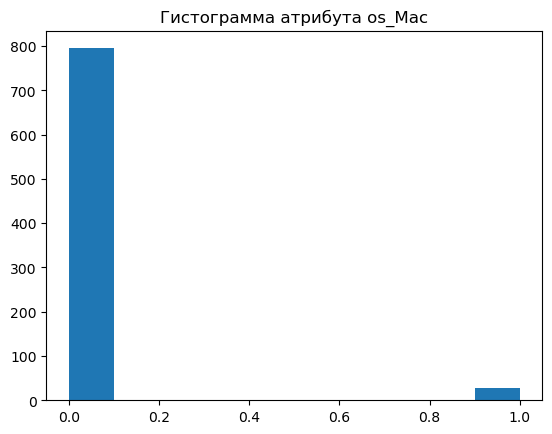

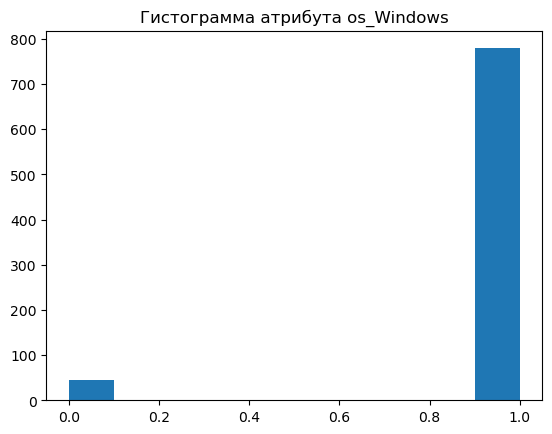

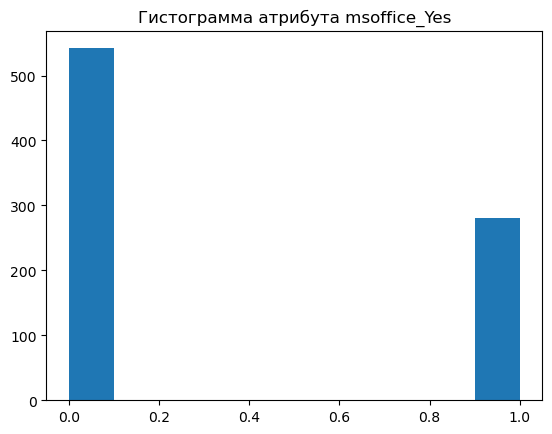

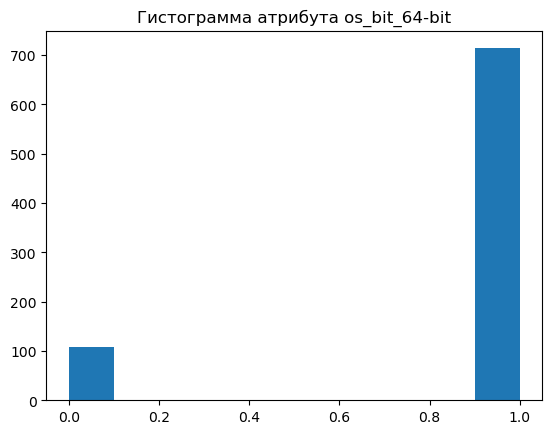

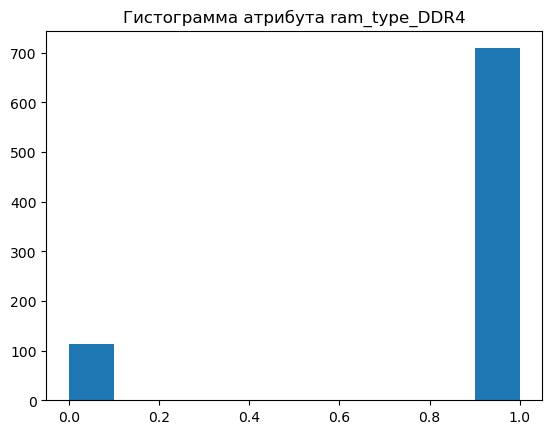

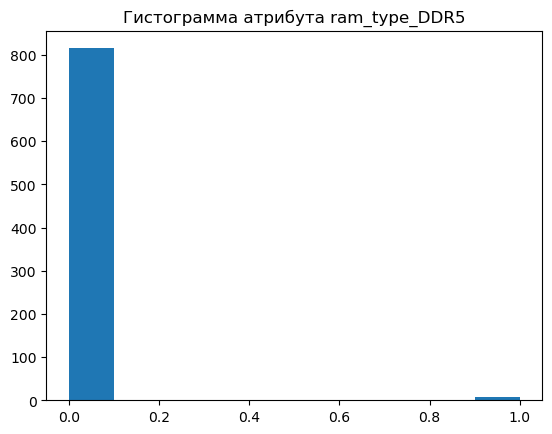

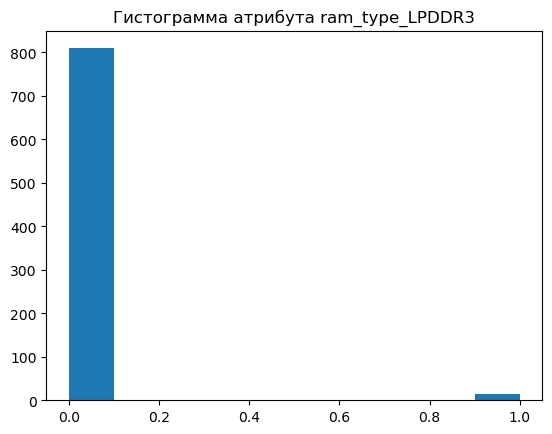

In [33]:
df1 = df.drop(columns=['brand', 'processor_brand', 'processor_name', 'processor_gnrtn'])
df1.drop(columns=['ram_type_LPDDR4', 'ram_type_LPDDR4X', 'Number of Reviews'], inplace=True)
# Путем множественных корректировок решено было удалить записи с высокой корреляцией, ибо они помешали бы обучению моделей

for attribute in df1.columns:
    plt.hist(df1[attribute])
    plt.title(f'Гистограмма атрибута {attribute}')
    plt.show()

Для каждого атрибута присутствует графический и статистический анализы плотности распределения значений

In [35]:
df1.corr()

,ram_gb,ssd,hdd,graphic_card_gb,Price,rating,Number of Ratings,weight_Gaming,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,os_Mac,os_Windows,msoffice_Yes,os_bit_64-bit,ram_type_DDR4,ram_type_DDR5,ram_type_LPDDR3
ram_gb,1.000000,0.390703,-0.176682,0.278544,0.518323,0.018126,-0.113348,0.064734,-0.109394,0.054577,-0.001886,-0.068882,0.056914,0.160973,-0.126156,-0.008915,0.119904,-0.066352,-0.015428,0.117137
ssd,0.390703,1.000000,-0.589509,0.334424,0.628272,0.037787,-0.164338,0.037574,-0.136346,0.032082,0.031853,-0.158932,0.171277,0.084305,0.046788,0.047106,0.176892,-0.101477,0.078854,0.131304
hdd,-0.176682,-0.589509,1.000000,-0.058491,-0.252699,-0.070010,0.103361,0.019174,-0.035781,-0.056688,-0.021337,0.142439,-0.191694,-0.103219,0.030237,-0.084602,-0.149626,0.080956,-0.039133,-0.072353
graphic_card_gb,0.278544,0.334424,-0.058491,1.000000,0.459986,0.040920,-0.027118,0.309310,-0.383413,0.111409,-0.026363,0.069713,-0.103253,-0.110320,-0.025615,-0.109552,-0.106540,-0.010857,0.186310,-0.058775
Price,0.518323,0.628272,-0.252699,0.459986,1.000000,-0.033528,-0.140392,-0.012524,-0.250425,-0.029339,0.080610,-0.045241,0.189126,0.312112,-0.337929,-0.105752,-0.018458,-0.270184,0.168689,0.181314
rating,0.018126,0.037787,-0.070010,0.040920,-0.033528,1.000000,0.155281,0.091386,-0.006979,0.104817,-0.074145,-0.219308,-0.003788,0.156620,-0.126205,0.193969,0.084223,0.087689,-0.054624,0.018628
Number of Ratings,-0.113348,-0.164338,0.103361,-0.027118,-0.140392,0.155281,1.000000,0.030231,-0.001456,0.031496,-0.037183,-0.092013,-0.100870,0.159968,-0.145443,0.002366,0.000907,0.033474,0.100017,-0.038396
weight_Gaming,0.064734,0.037574,0.019174,0.309310,-0.012524,0.091386,0.030231,1.000000,-0.153275,-0.037818,-0.028256,0.070449,-0.081525,-0.041857,0.053007,0.008250,0.053402,0.089434,-0.022097,-0.029340
weight_ThinNlight,-0.109394,-0.136346,-0.035781,-0.383413,-0.250425,-0.006979,-0.001456,-0.153275,1.000000,-0.053349,0.059081,-0.028489,-0.154320,-0.128971,0.128610,0.158437,0.191715,0.064570,-0.068087,-0.009882
warranty_2 years,0.054577,0.032082,-0.056688,0.111409,-0.029339,0.104817,0.031496,-0.037818,-0.053349,1.000000,-0.021481,-0.121100,-0.039115,-0.031821,0.040297,0.033379,0.001004,0.067990,-0.016799,-0.022305


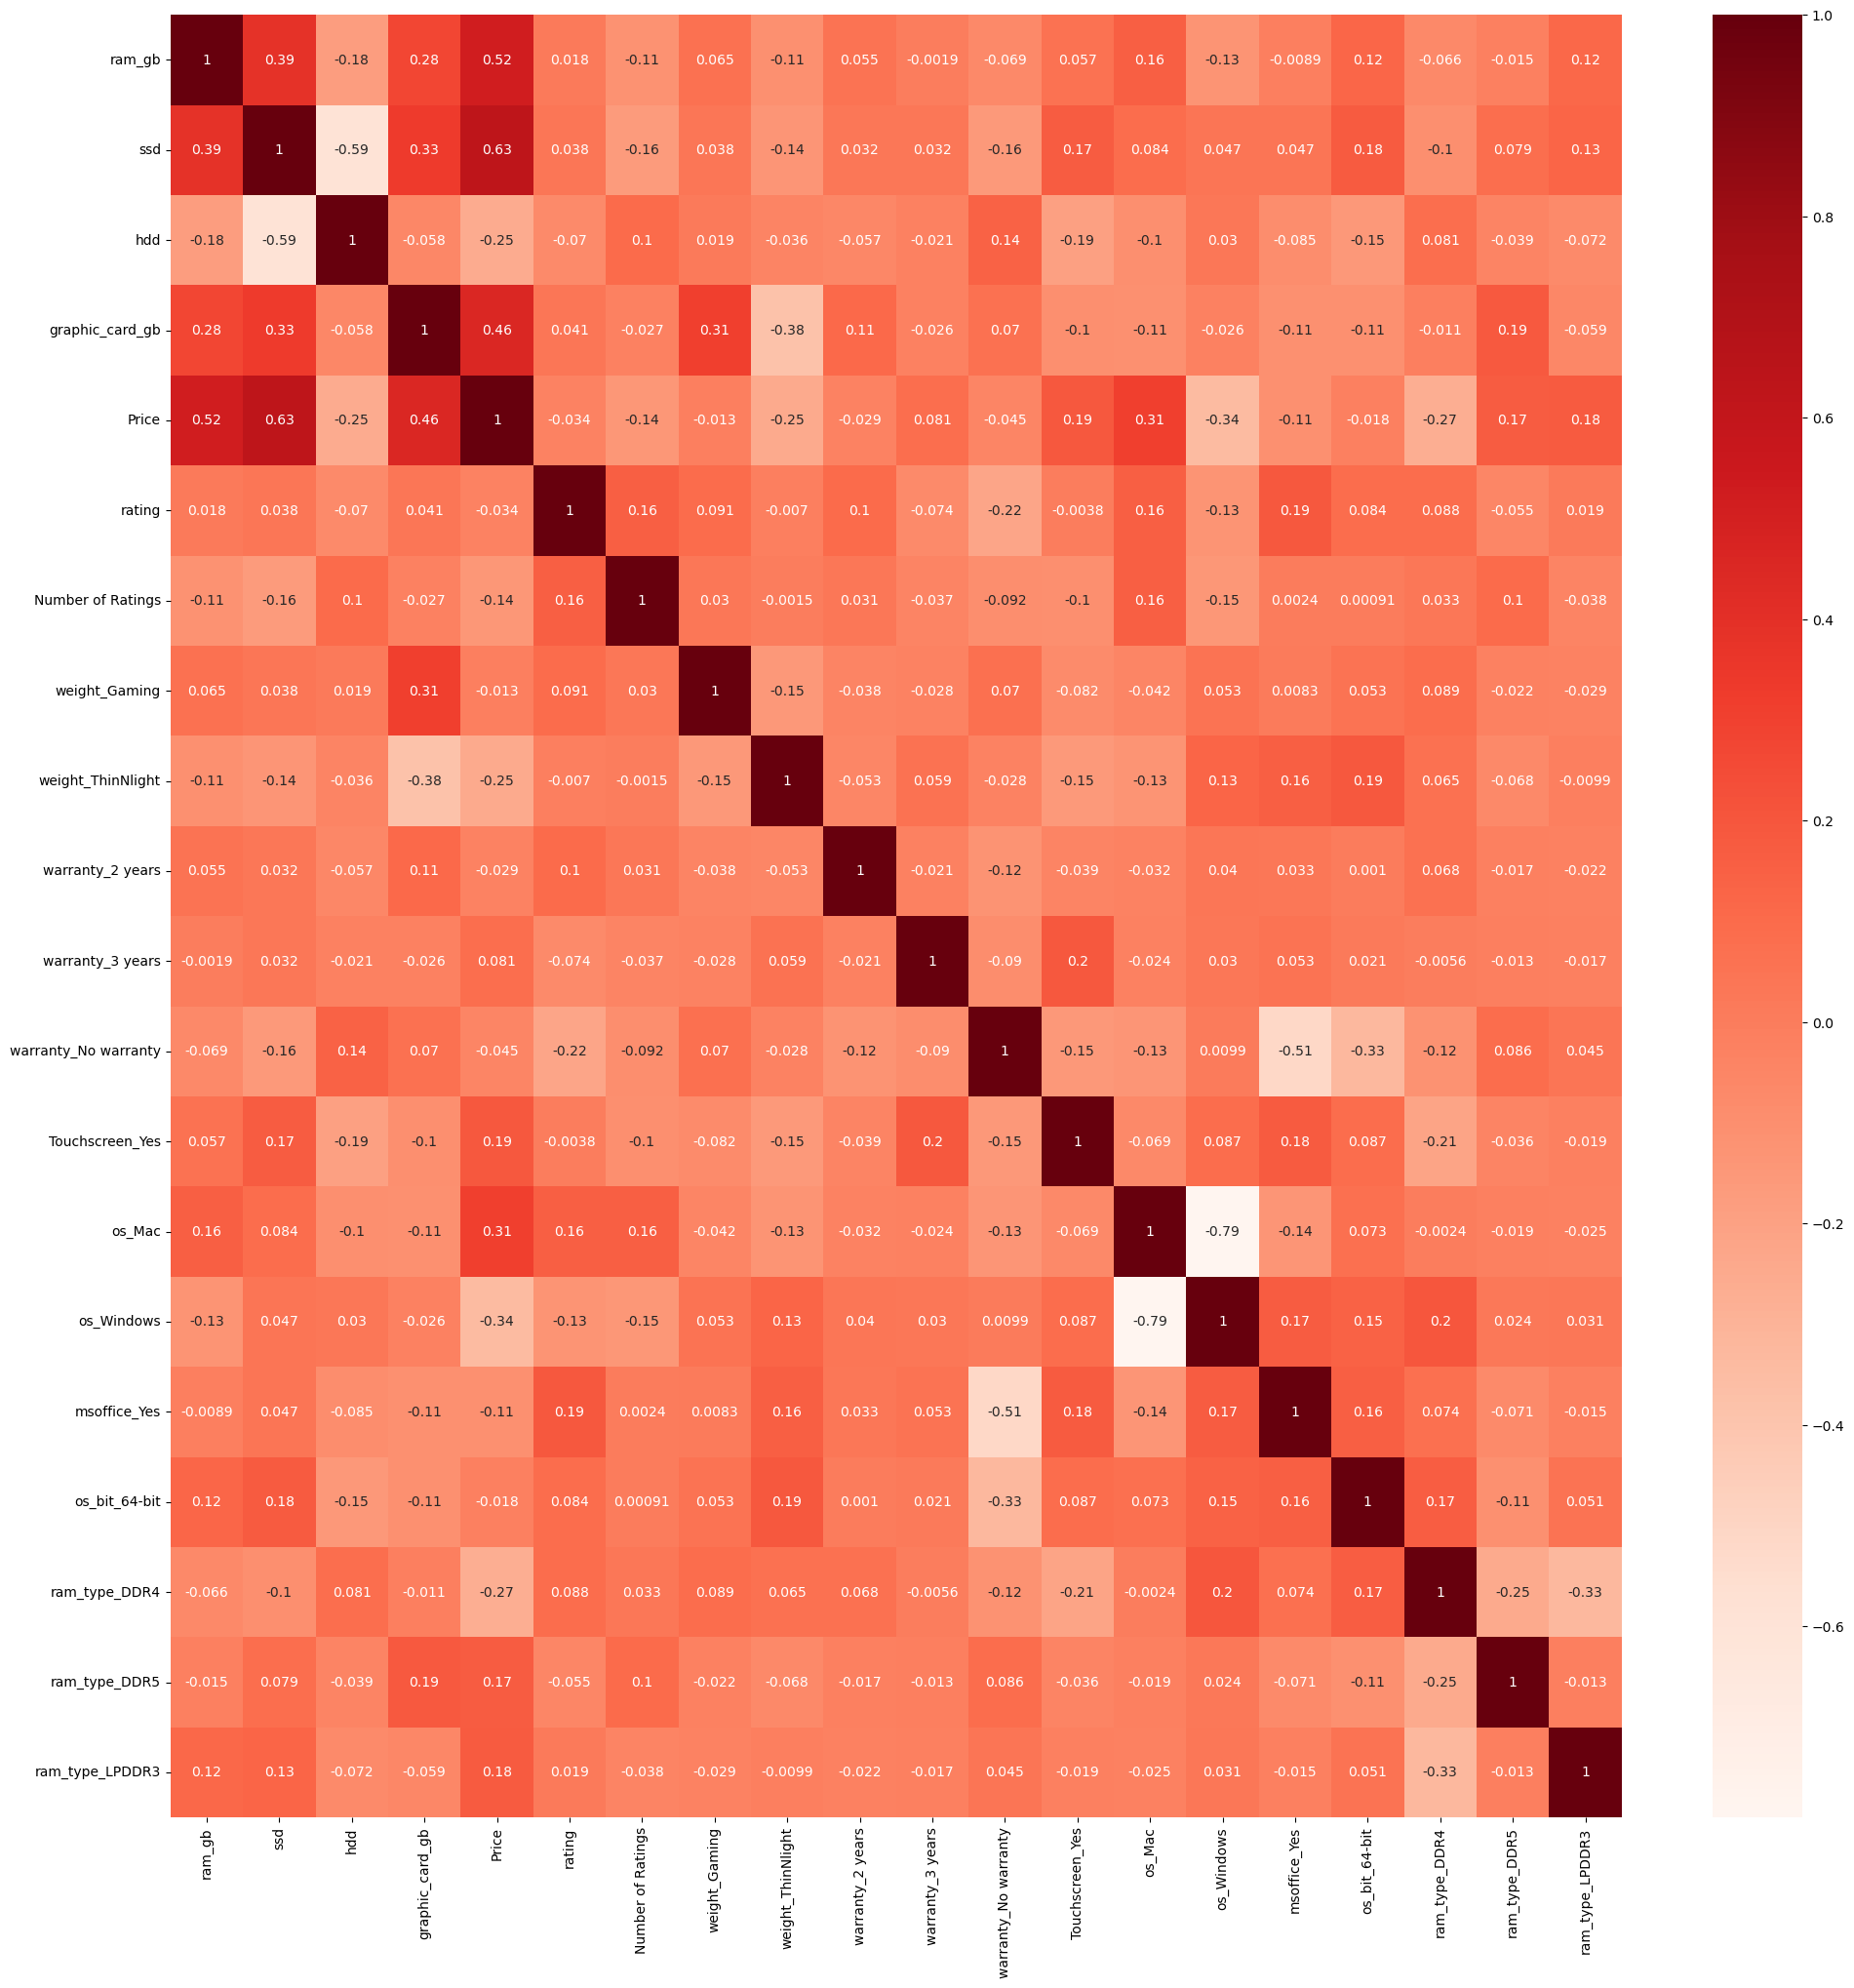

In [36]:
plt.figure(figsize=(24, 24))
sns.heatmap(df1.corr(), annot=True, cmap='Reds');

Видим сильную кореляцию между OS_windows и OS_mac, но решено было оставить записи, ибо мы не можем удалить целую операционную систему и смотреть исключительно по Windows, хотя по датафрейму очень мало записей с OS_MAC, будет нерационально удалить значения, учитывая и без того малое количество записей

In [38]:
df1.head()

,ram_gb,ssd,hdd,graphic_card_gb,Price,rating,Number of Ratings,weight_Gaming,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,os_Mac,os_Windows,msoffice_Yes,os_bit_64-bit,ram_type_DDR4,ram_type_DDR5,ram_type_LPDDR3
0,4,0,1024,0,34649,2,3,0,0,0,0,1,0,0,1,0,1,1,0,0
1,4,0,1024,0,38999,3,65,0,0,0,0,1,0,0,1,0,1,1,0,0
2,4,0,1024,0,39999,3,8,0,0,0,0,1,0,0,1,0,1,1,0,0
3,8,512,0,2,69990,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,4,0,512,0,26990,3,0,0,0,0,0,1,0,0,1,0,1,1,0,0


In [39]:
x = df1.drop('Price', axis=1)
y = df1['Price']

Создаем целевую переменную Y, и X - Dataframe не содержащий целевую переменную

### Вывод
Данные в датафрейме распределены в большинстве своем неравномерно. Данные в датафрейме были преобразованны из типа object в тип INT для тепловой карты и гистограммы. Значения в гистограммах в большинстве своем распределены у крайних значений.

# Обучение моделей

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

импортируем модели, метрики, метод для разделения данных.

Мы будем рассматиривать модели регрессии: LinearRegression, DecisionTreeRegressor, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y ,test_size=0.3, random_state=42)

Разделили данные на тренировочные и тестовые

In [47]:
LR = LinearRegression()

In [48]:
LR.fit(X_train,Y_train)

LinearRegression()

In [49]:
y_LRpred = LR.predict(X_test)

In [50]:
print('r2score',metrics.r2_score(Y_test, y_LRpred))

r2score 0.6566144706086835


Использовав линейную регрессию мы видим что она показывает неплохой результат

так же графически мы видим зависимости

In [53]:
kf = KFold(5, random_state=42, shuffle=True)
cross_val = cross_val_score(LR, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [54]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.6825694  0.78465051 0.66040561 0.76258173 0.53935394]
Train CV mean : 0.686


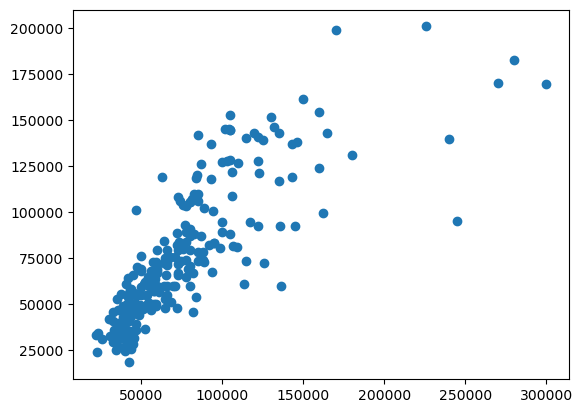

In [55]:
plt.scatter(Y_test,y_LRpred);

In [56]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [57]:
Y_DTpred = decision_tree_regressor.predict(X_test)

In [58]:
print('r2score',metrics.r2_score(Y_test,Y_DTpred))

r2score 0.5483201615368827


In [59]:
kfDTR = KFold(5)
cross_val_DTR = cross_val_score(decision_tree_regressor, X_train, Y_train, cv=kfDTR, scoring='r2')
cv_mean_DTR = np.mean(cross_val_DTR)

In [60]:
print("Train CV scores :", cross_val_DTR)
print("Train CV mean :", round(cv_mean_DTR, 3))

Train CV scores : [0.49781633 0.55840518 0.44041231 0.52147006 0.24386048]
Train CV mean : 0.452


Видим что r2score очень низок, значит модель нам не подходит

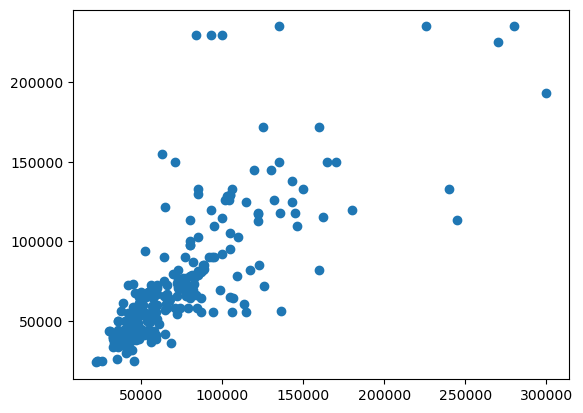

In [62]:
plt.scatter(Y_test,Y_DTpred);

In [63]:
X_train.shape

(576, 19)

In [64]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [65]:
pred_test_knn = knn.predict(X_test)
print('r2score',metrics.r2_score(Y_test, pred_test_knn))

r2score 0.4126739936773961


Почти та же ситуация, модель показала результат чуть лучше предыдущей, но это все равно нам не подходит

In [67]:
kfKNN = KFold(5, random_state=42, shuffle=True)
cross_val_KNN = cross_val_score(knn, X_train, Y_train, cv=kfKNN, scoring='r2')
cv_mean_KNN = np.mean(cross_val_KNN)

In [68]:
print("Train CV scores :", cross_val_KNN)
print("Train CV mean :", round(cv_mean_KNN, 3))

Train CV scores : [0.5719071  0.65023396 0.48528933 0.48122721 0.27543348]
Train CV mean : 0.493


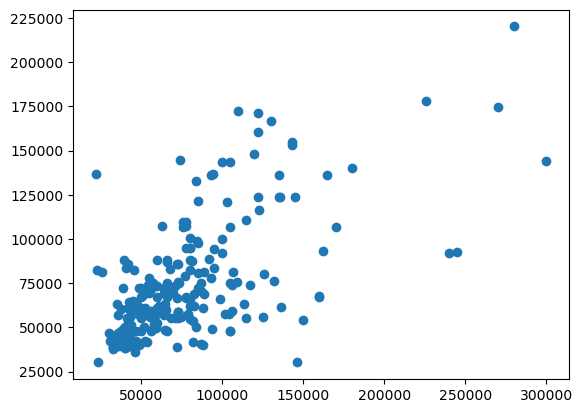

In [69]:
plt.scatter(Y_test,pred_test_knn);

In [70]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [71]:
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)

RandomForestRegressor()

In [72]:
Y_RFRpred = RFR.predict(X_test)

In [73]:
print('r2score',metrics.r2_score(Y_test, Y_RFRpred))

r2score 0.725363371327177


Модель RandomForestRegressor показала хороший результат который мы можем принять как подходящую модель

In [75]:
kfRFR = KFold(5, random_state=42, shuffle=True)
cross_val_RFR = cross_val_score(RFR, X_train, Y_train, cv=kfRFR, scoring='r2')
cv_mean_RFR = np.mean(cross_val_RFR)

In [76]:
print("Train CV scores :", cross_val_RFR)
print("Train CV mean :", round(cv_mean_RFR, 3))

Train CV scores : [0.74353471 0.66959207 0.56634976 0.70884641 0.64328762]
Train CV mean : 0.666


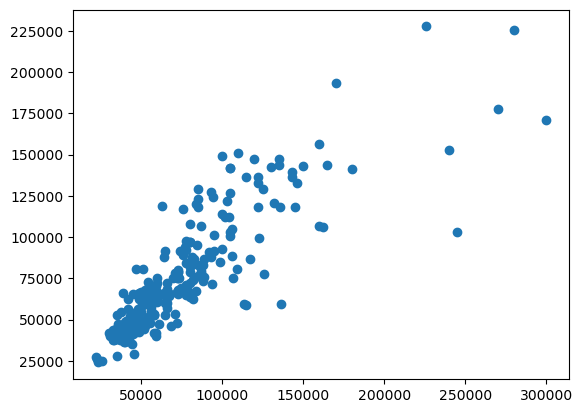

In [77]:
plt.scatter(Y_test,Y_RFRpred);

In [78]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, Y_train)

GradientBoostingRegressor()

In [79]:
Y_GBRpred = GBR.predict(X_test)

In [80]:
print('r2score',metrics.r2_score(Y_test, Y_GBRpred))

r2score 0.7106686052972897


GradientBoostingRegressor тоже показала хороший результат который мы можем принять

In [82]:
kfGBR = KFold(5, random_state=42, shuffle=True)
cross_val_GBR = cross_val_score(RFR, X_train, Y_train, cv=kfGBR, scoring='r2')
cv_mean_GBR = np.mean(cross_val_GBR)

In [83]:
print("Train CV scores :", cross_val_GBR)
print("Train CV mean :", round(cv_mean_GBR, 3))

Train CV scores : [0.738294   0.64604215 0.56787496 0.70761833 0.62348146]
Train CV mean : 0.657


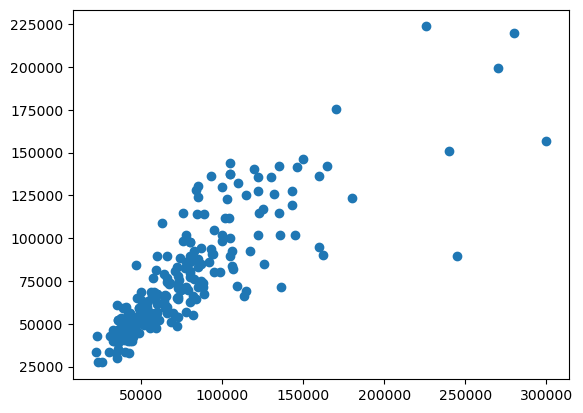

In [84]:
plt.scatter(Y_test,Y_GBRpred);

### Лучшие модели

In [86]:
print('GradientBoostingRegressor -',metrics.r2_score(Y_test, Y_GBRpred))
print('RandomForestRegressor -',metrics.r2_score(Y_test, Y_RFRpred))
print('LinearRegression -',metrics.r2_score(Y_test, y_LRpred))

GradientBoostingRegressor - 0.7106686052972897
RandomForestRegressor - 0.725363371327177
LinearRegression - 0.6566144706086835


Выбраны 3 самые рациональные модели регрессии, из 5 взятых, Так как они хорошо работают с малым количеством данных, что подходит для условия нашего датафрейма

# Итог

При проведении разведочного анализа, аномальных значений выявлено не было, пропущенных значений так же не было.
При предобработке данных перед их непосредственным использованием в моделях, мы привели типы OBJECT в INT что бы мы могли использовать их при обучении модели.
При обучении моделей мы использовали 5 моделей, но только 3 из них показали удовлетворительный результат. Лучшей моделью оказалась GradientBoostingRegressor.